### 精度検証

In [1]:
from kineticEQ import BGK1DPlot

config_holo = {
    "solver": "implicit",
    "implicit_solver": "holo",
    "ho_iter": 64,
    "lo_iter": 64,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_holo = BGK1DPlot(**config_holo)

--- auto compile ---
--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- compile LO block-tridiag backend ---


Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- LO block-tridiag backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: holo
  ho_iter: 64, ho_tol: 1e-06
  lo_iter: 64, lo_tol: 1e-06
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-06
 ---- space ----
  space: nx=500, dx=0.0020, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module lo_blocktridiag...
NoneType: None


In [2]:
sim_holo.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_holo.save_benchmark_results(filename="holo_benchmark")

--- Benchmark Start, benc_type: velocity ---
--- Run Benchmark Simulation (nv = 65) ---


Progress: 100%|██████████| 100/100 [00:02<00:00, 40.27it/s]


--- Run Benchmark Simulation (nv = 129) ---


Progress: 100%|██████████| 100/100 [00:02<00:00, 41.47it/s]


--- Run Benchmark Simulation (nv = 257) ---


Progress: 100%|██████████| 100/100 [00:02<00:00, 40.31it/s]


--- Run Benchmark Simulation (nv = 513) ---


Progress: 100%|██████████| 100/100 [00:02<00:00, 38.41it/s]


--- Run Benchmark Simulation (nv = 1025) ---


Progress: 100%|██████████| 100/100 [00:02<00:00, 34.69it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: holo_benchmark  (7.68 MB)


'holo_benchmark'

In [3]:
config_implicit = {
    "solver": "implicit",
    "implicit_solver": "backend",
    "picard_iter": 4096,
    "picard_tol": 1e-6,
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-4,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_implicit = BGK1DPlot(**config_implicit)

--- auto compile ---
--- compile cuSOLVER ---
--- compile CUDA fused implicit backend ---


No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module implicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- fused CUDA backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: implicit
  implicit solver: backend
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-06
 ---- space ----
  space: nx=500, dx=0.0020, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module implicit_fused...
NoneType: None


In [4]:
sim_implicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_implicit.save_benchmark_results(filename="implicit_benchmark")

--- Benchmark Start, benc_type: velocity ---
--- Run Benchmark Simulation (nv = 65) ---


Progress: 100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


--- Run Benchmark Simulation (nv = 129) ---


Progress: 100%|██████████| 100/100 [00:13<00:00,  7.22it/s]


--- Run Benchmark Simulation (nv = 257) ---


Progress: 100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


--- Run Benchmark Simulation (nv = 513) ---


Progress: 100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


--- Run Benchmark Simulation (nv = 1025) ---


Progress: 100%|██████████| 100/100 [01:10<00:00,  1.41it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: implicit_benchmark  (7.68 MB)


'implicit_benchmark'

In [5]:
config_explicit = {
    "solver": "explicit",
    "explicit_solver": "backend",
    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "dt": 5e-7,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_explicit = BGK1DPlot(**config_explicit)

--- auto compile ---
--- compile CUDA fused explicit backend ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module explicit_fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
--- fused CUDA backend loaded ---
--- auto compile complete ---
initiaze complete:
  solver: explicit
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-06
 ---- space ----
  space: nx=500, dx=0.0020, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=100001, dt=0.0000, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


Loading extension module explicit_fused...
NoneType: None


In [6]:
sim_explicit.run_benchmark(benc_type="velocity", grid_list=[65, 129, 257, 513, 1025])
sim_explicit.save_benchmark_results(filename="explicit_benchmark")

--- Benchmark Start, benc_type: velocity ---
--- Run Benchmark Simulation (nv = 65) ---


Progress: 100%|██████████| 100000/100000 [00:10<00:00, 9207.77it/s]


--- Run Benchmark Simulation (nv = 129) ---


Progress: 100%|██████████| 100000/100000 [00:11<00:00, 8479.11it/s]


--- Run Benchmark Simulation (nv = 257) ---


Progress: 100%|██████████| 100000/100000 [00:14<00:00, 7056.36it/s]


--- Run Benchmark Simulation (nv = 513) ---


Progress: 100%|██████████| 100000/100000 [00:19<00:00, 5232.90it/s]


--- Run Benchmark Simulation (nv = 1025) ---


Progress: 100%|██████████| 100000/100000 [00:27<00:00, 3625.85it/s]

--- Benchmark Completed ---
ベンチマーク結果を保存: explicit_benchmark  (7.68 MB)


'explicit_benchmark'

ベンチマーク結果を読み込み: holo_benchmark  (meta: {'saved_at': '2025-12-03T07:46:03', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


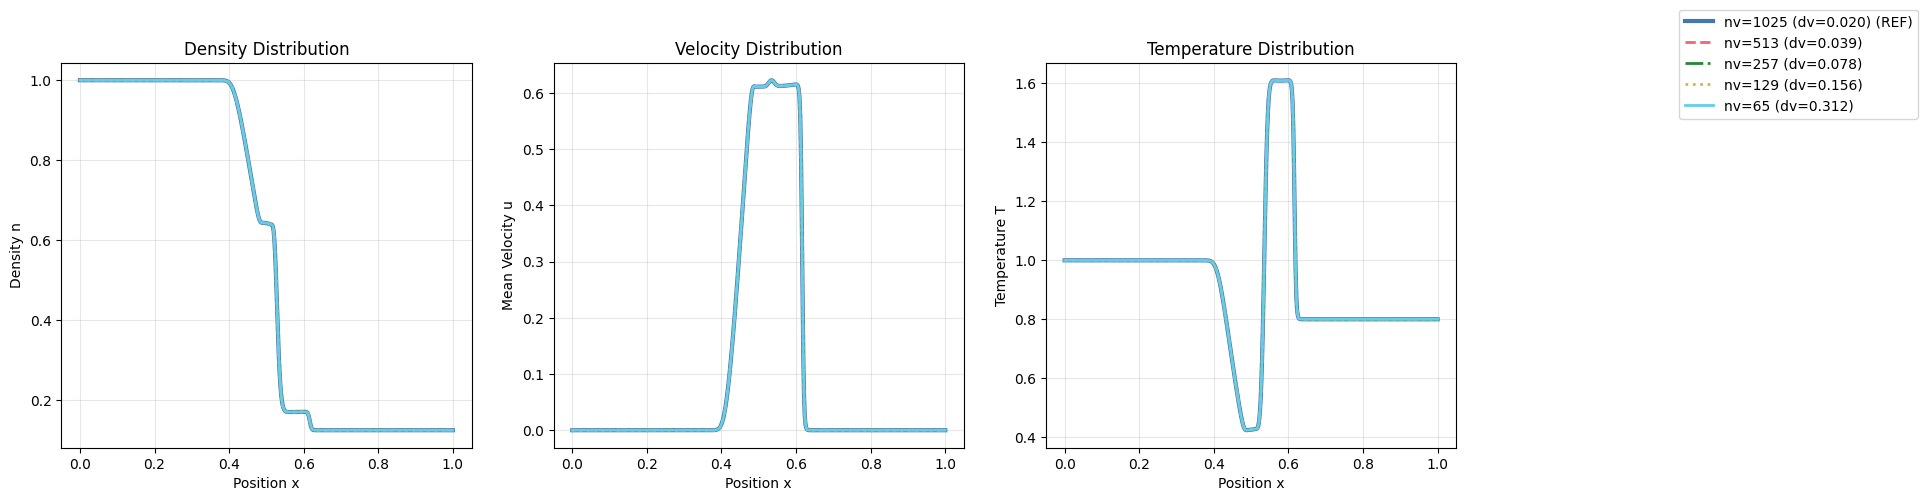

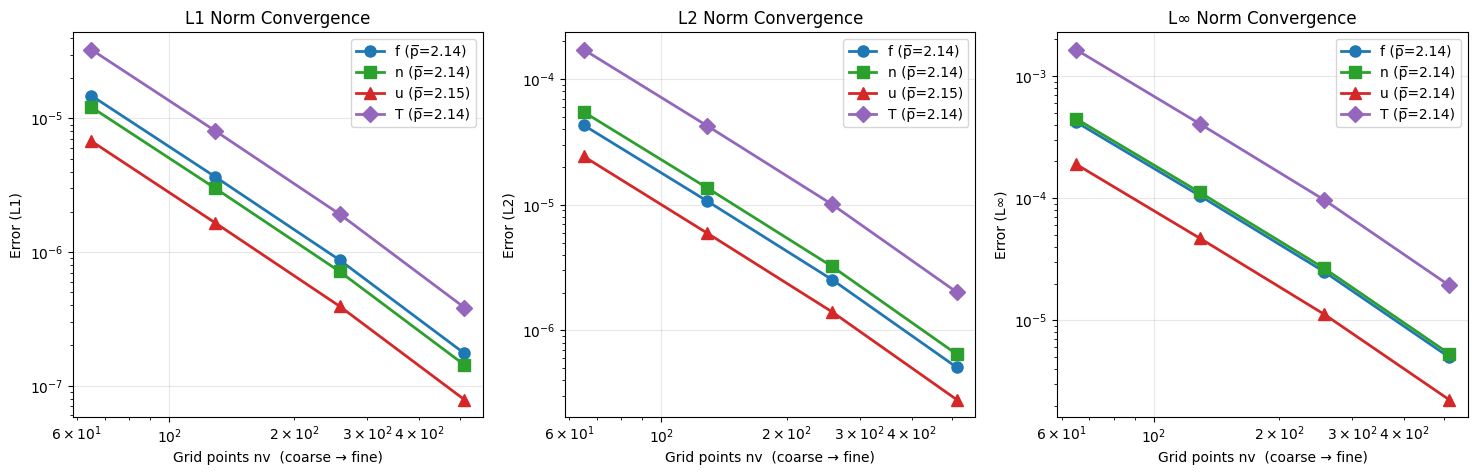

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(2.142713243925069),
   'n': np.float64(2.1423256172234635),
   'u': np.float64(2.1487203840800175),
   'T': np.float64(2.143982991717724)},
  'L2': {'f': np.float64(2.141307052313048),
   'n': np.float64(2.1416788474115793),
   'u': np.float64(2.150287332408724),
   'T': np.float64(2.1444460569175514)},
  'Linf': {'f': np.float64(2.1396048735793647),
   'n': np.float64(2.1383736932397857),
   'u': np.float64(2.14252412198827),
   'T': np.float64(2.144796147177774)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'velocity',
 'ref_grid': 1025}

In [7]:
# 結果表示
tmp = sim_holo.load_benchmark_results("holo_benchmark")
err = sim_holo.compute_error(tmp)
sim_holo.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: implicit_benchmark  (meta: {'saved_at': '2025-12-03T07:48:36', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'implicit'})


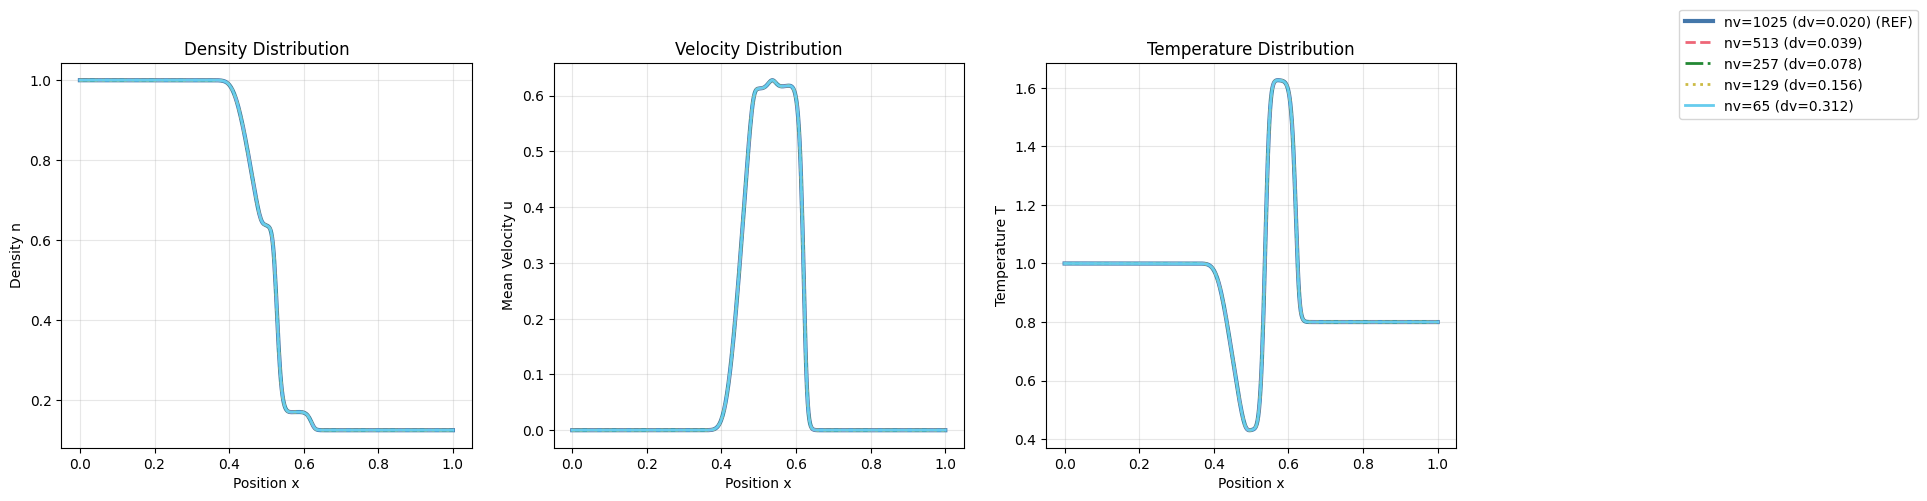

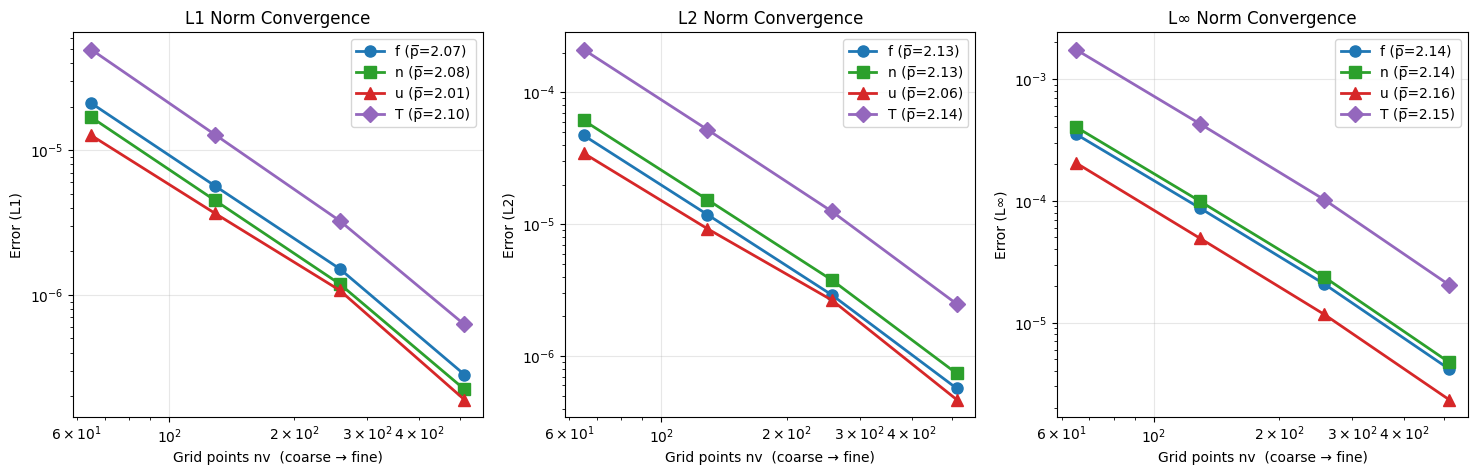

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(2.072443615157412),
   'n': np.float64(2.0784500734916387),
   'u': np.float64(2.009505262539257),
   'T': np.float64(2.104853378463031)},
  'L2': {'f': np.float64(2.1281662175891594),
   'n': np.float64(2.128391274071006),
   'u': np.float64(2.0555909169257505),
   'T': np.float64(2.1420694590415263)},
  'Linf': {'f': np.float64(2.141854152545201),
   'n': np.float64(2.144902052786967),
   'u': np.float64(2.1578642458738915),
   'T': np.float64(2.1451416787581254)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'velocity',
 'ref_grid': 1025}

In [8]:
tmp = sim_implicit.load_benchmark_results(filename="implicit_benchmark")
err = sim_implicit.compute_error(tmp)
sim_implicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

ベンチマーク結果を読み込み: explicit_benchmark  (meta: {'saved_at': '2025-12-03T07:50:00', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': 'explicit'})


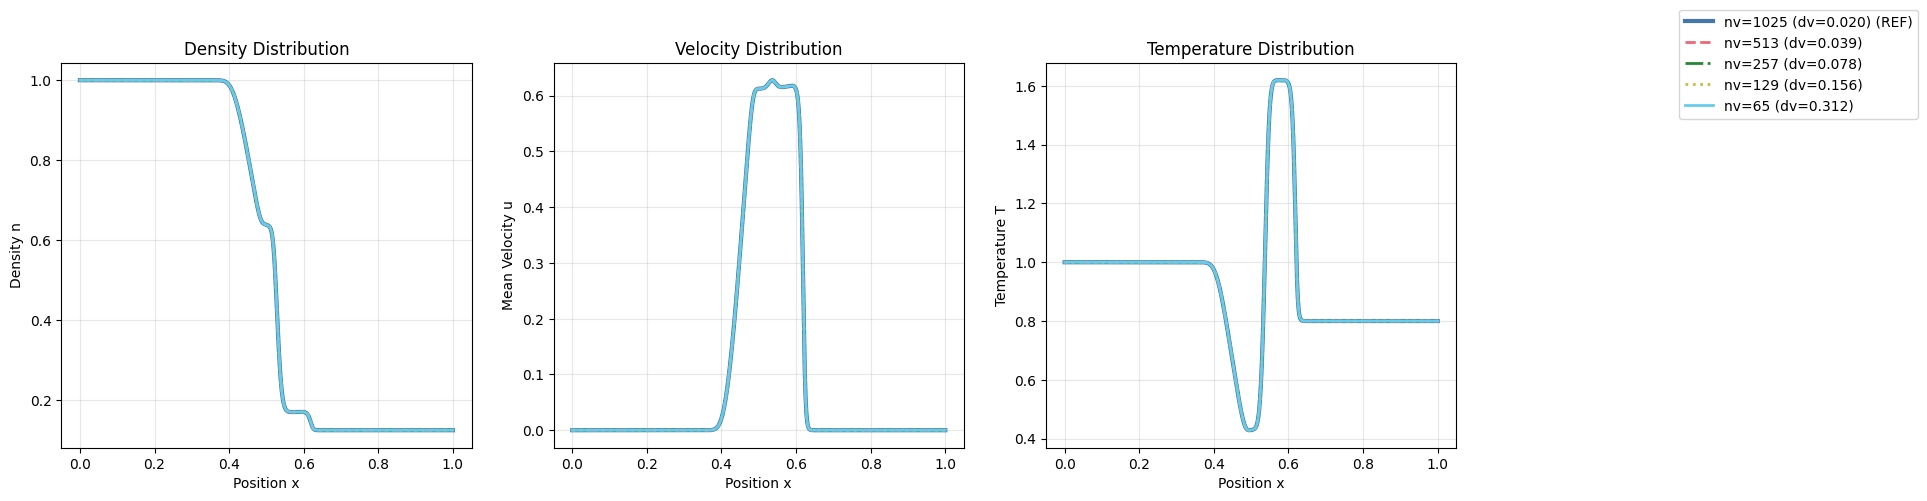

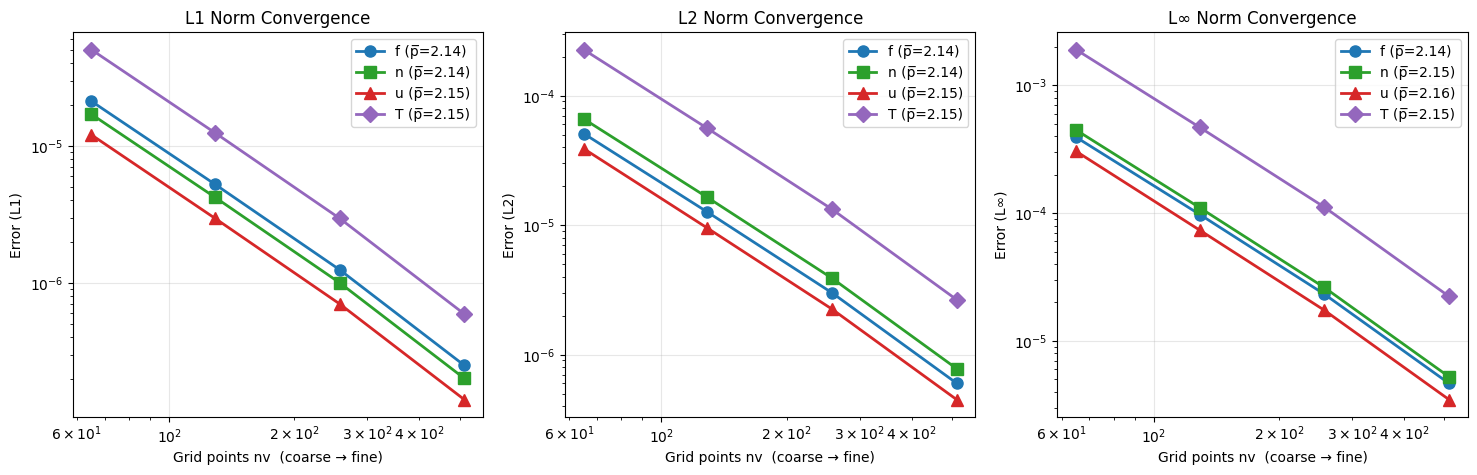

モーメント比較図を保存: moments.png
誤差収束図を保存: errors.png
図を画面に表示しました


{'convergence_orders': {'L1': {'f': np.float64(2.143360286055389),
   'n': np.float64(2.1433880398962875),
   'u': np.float64(2.1481240997983293),
   'T': np.float64(2.145004415763112)},
  'L2': {'f': np.float64(2.1424012437319626),
   'n': np.float64(2.1429717278384595),
   'u': np.float64(2.1525939452083045),
   'T': np.float64(2.145431623405759)},
  'Linf': {'f': np.float64(2.140937381085582),
   'n': np.float64(2.145565525346294),
   'u': np.float64(2.1582008413511793),
   'T': np.float64(2.1455844567565863)}},
 'figures_saved': ['moments.png', 'errors.png'],
 'benchmark_type': 'velocity',
 'ref_grid': 1025}

In [9]:
tmp = sim_explicit.load_benchmark_results(filename="explicit_benchmark")
err = sim_explicit.compute_error(tmp)
sim_explicit.plot_benchmark_results(bench_results=tmp, error_dict=err, show_plots=True)

In [ ]:
from kineticEQ import BGK1DPlot

config_cross_test = {
    "ho_iter": 4096,
    "lo_iter": 4096,
    "ho_tol": 1e-6,
    "lo_tol": 1e-6,
    "picard_iter": 4096,
    "picard_tol": 1e-8,

    "tau_tilde": 5e-6,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_cross = BGK1DPlot(**config_cross_test)
sim_cross._run_scheme_comparison_test(scheme_list=["explicit", "implicit", "holo"], scheme_delta_t_list=[5e-7, 5e-4, 5e-7])
sim_cross.plot_cross_scheme_results(ref_scheme="explicit")